In [1]:
# Question 3: Implement a Simple CNN for Image Classification
# Description: Use Keras to implement a basic Convolutional Neural Network (CNN) to classify the MNIST digit dataset.

2025-05-28 10:46:15.246636: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 10:46:15.250107: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 10:46:15.259226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748429175.273840   13591 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748429175.278345   13591 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748429175.291131   13591 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-28 10:46:23.325707: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5


2025-05-28 10:46:23.660268: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


844/844 - 24s - 28ms/step - accuracy: 0.9410 - loss: 0.1896 - val_accuracy: 0.9837 - val_loss: 0.0610
Epoch 2/5
844/844 - 40s - 47ms/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.9855 - val_loss: 0.0499
Epoch 3/5
844/844 - 40s - 48ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9900 - val_loss: 0.0388
Epoch 4/5
844/844 - 41s - 48ms/step - accuracy: 0.9910 - loss: 0.0301 - val_accuracy: 0.9898 - val_loss: 0.0357
Epoch 5/5
844/844 - 22s - 26ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9885 - val_loss: 0.0407
 34/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9909 - loss: 0.0189

2025-05-28 10:49:29.980778: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9869 - loss: 0.0365
Test accuracy: 0.9894


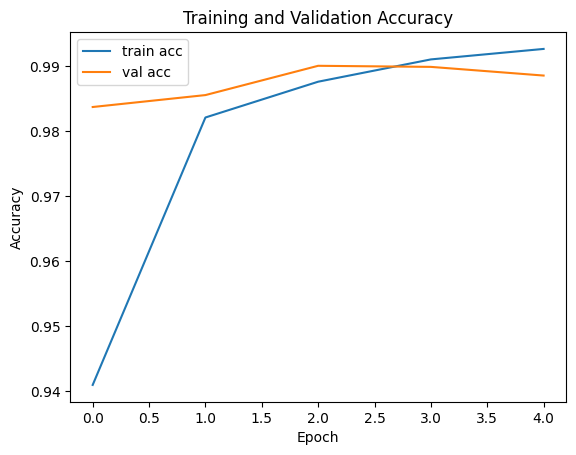

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255) to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape to include channel dimension (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.1, verbose=2)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
